In [1]:
#Importing lib.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use(['science', 'notebook', 'grid'])

### Heat diffusion equation
$$\nabla ^2 T = \frac{1}{k} \frac{\partial T}{\partial t}$$

We are interested in solving **steady-state solution** so,
$$\nabla ^2 T = 0$$
Boundary conditions:
1. $T(x, 0) = 100$
2. $T(x, \infty)=0$
3. $T(0, y) = 0$
4. $T(10, y) = 0$

Solving the steady state equation with the above condtions(except 1) we end up with
$$T(x, y) = \sum_{n=1}^{\infty}A_n \sin  \left(\frac{n \pi x}{10}\right) \exp \left(-\frac{n \pi y}{10}\right)$$

If we import the condition(1), i.e, $T(x, 0) = 100$
$$100 = \sum_{n=1}^{\infty}A_n \sin\left(\frac{n\pi x}{10}\right)$$
Using the Fourier series we can write 
$$A_n = \frac{2}{10} \int_{0}^{10}100 \sin \left(\frac{m\pi x}{10}\right)$$

In [2]:
#Simpson rule to find the definte integrals
def Simpson(xi, xf, n, f):
    x = np.linspace(xi, xf, n)
    h = (xf - xi)/(n - 1)
    y = f(x)
 
    sum1 = 0
    for i in range(1, n-1, 2):
        sum1 += y[i]
 
    sum2 = 0
    for i in range(2, n-1, 2):
        sum2 += y[i]
     
    #Simpson 1/3 rule    
    sum = h*(y[0] + 4*sum1 + 2*sum2 + y[n-1])/3
    
    return sum

In [3]:
def A(m): return 20*Simpson(0, 10, 1001, lambda x: np.sin(m*np.pi*x/10))

In [4]:
def T(x, y, n):
    sum = 0
    for i in range(1, n+1):
        sum += A(i)*np.sin(i*np.pi*x/10)*np.exp(-i*np.pi*y/10)
    return sum

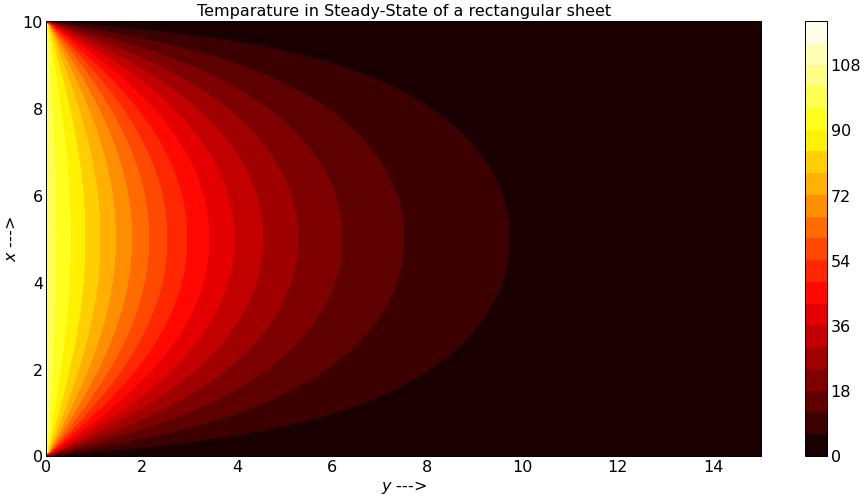

In [5]:
#Contour Plot
y = np.linspace(0, 15, 1000)
x = np.linspace(0, 10, 100)

X, Y = np.meshgrid(x, y)
Z = T(X, Y, 100)

plt.figure(figsize=(16, 8))
plt.contourf(Y, X, Z, 20, cmap = "hot")
plt.colorbar()
plt.ylabel(r"$x$ --->")
plt.xlabel(r"$y$ --->")
plt.title('Temparature in Steady-State of a rectangular sheet')
plt.show()